**Vishv Patel**

**Student Number** : 8977662

## Practical Lab 4 - Polynomial Regression, and Evaluation using R-Squared, MAPE and MAE.

In this lab, I have to run univariate polynomial regression models, and evaluate them using R-squared, Mean Absolute Percentage Error (MAPE) and Mean Absolute Error (MAE) metrices. The dataset will be Scikit-Learn Diabetes dataset.

### 1. Frame the Problem :
The goal is to build a model that can __best predict the risk of diabetes progression__, given the __body mass index  (BMI)__ feature in the dataset. This will be used as a screening tool to help physicians with identifying patients at risk.

Importing the library

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### 2. Get the Data

In [2]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

### 3. EDA - Describe the data, explore it, and provide insights about it. This should include at least: statistics, histograms, and a correlation matrix

In [3]:
# Showing statistics by describing dataset
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# 1. Basic Statistics
statistics = df.describe()
print(statistics)
df.head()


                age           sex           bmi            bp            s1   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17  
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


__Attribute Information:__
- age = age in years
- sex
- bmi = body mass index
- bp = average blood pressure
- s1 tc = total serum cholesterol
- s2 ldl = low-density lipoproteins
- s3 hdl = high-density lipoproteins
- s4 tch = total cholesterol / HDL
- s5 ltg = possibly log of serum triglycerides level
- s6 glu = blood sugar level

count    4.420000e+02
mean    -2.245564e-16
std      4.761905e-02
min     -9.027530e-02
25%     -3.422907e-02
50%     -7.283766e-03
75%      3.124802e-02
max      1.705552e-01
Name: bmi, dtype: float64


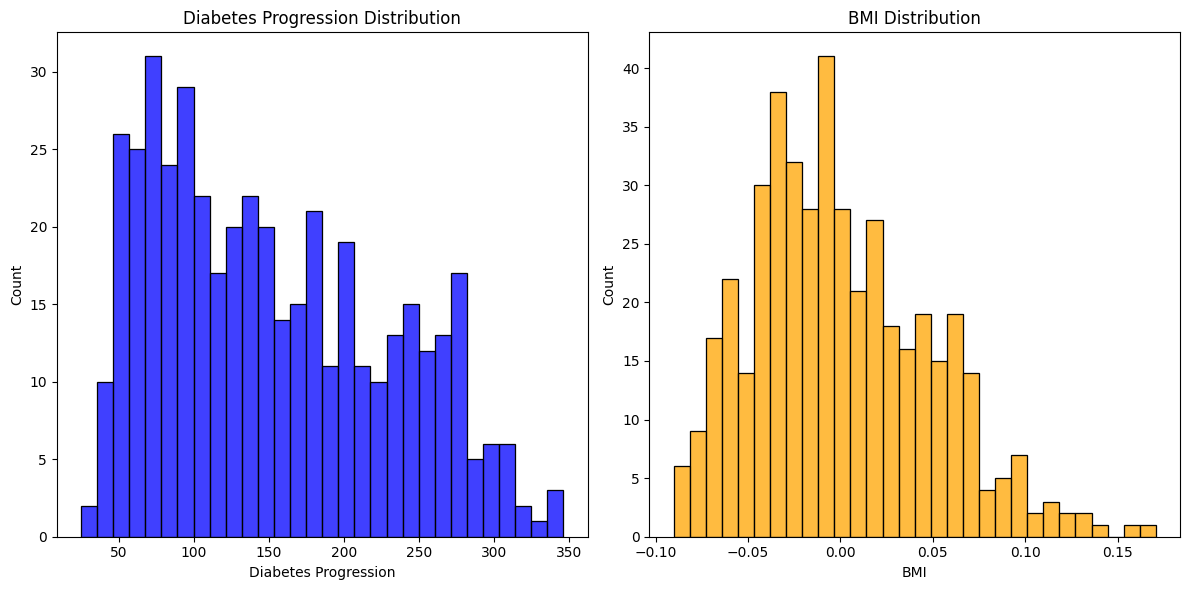

In [4]:
# Histograms

df['target'] = diabetes.target 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['target'], bins=30, color='blue')
plt.title('Diabetes Progression Distribution')
plt.xlabel('Diabetes Progression')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(df['bmi'], bins=30, color='orange')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
bmi_stats = df['bmi'].describe()
print(bmi_stats)

plt.tight_layout()
plt.show()



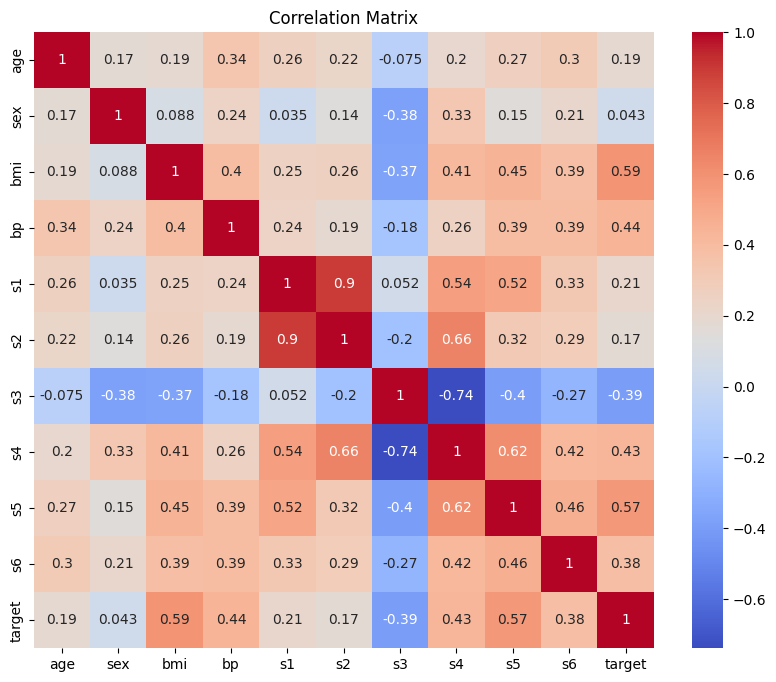

In [5]:
# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

#### Insights about dataset

This dataset is used to predict the progression of diabetes based on ten baseline variables, such as age, sex, body mass index, average blood pressure, and six blood serum measurements for 442 diabetes patients.

Here's a brief overview of the dataset:

1. Number of Instances: 442<br>
2. Number of Attributes: 10 numeric predictive attributes and one target variable (the progression of the disease).<br>
3. Target Variable: A quantitative measure of disease progression one year after baseline.<br>
4. Histograms: The histograms reveal the distributions of features. Some features, like BMI (Body Mass Index), appear approximately normally distributed. These distributions provide insight into the data's characteristics and may help in selecting appropriate modeling techniques. <br>
5. Correlation Matrix: The correlation matrix shows the relationships between features and the target variable.
Features such as BMI, blood pressure, and serum measurements (e.g., serum glucose) exhibit moderate correlations with the target variable, indicating potential predictive power. There are also correlations among features themselves, which could affect model performance and multicollinearity considerations in regression analysis.

### 4. Clean the data if needed, and explain your reasoning for your reader

In [107]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

From the above code, we came to know that the data is already standardized and there is Zero null values in this dataset. So, we do not need to clean the data.

### 5. Split the dataset to a train (70%), validation (15%) and test (15%) sets.

In [108]:
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(diabetes.data, diabetes.target, test_size=0.3, random_state=42)

# Splitting the temporary set into validation and test sets (50% each from the temporary set)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Displaying the sizes of train, validation, and test sets
print("Train set size:", len(X_train_temp))
print("Validation set size:", len(X_valid))
print("Test set size:", len(X_test))

Train set size: 309
Validation set size: 66
Test set size: 67


### 6. Run a polynomial regression on the BMI feature versus the " disease progression one year after baseline" - from degree 0 to 5 (6 models) 

In [109]:
# Extracting BMI feature
X_bmi = diabetes.data[:, np.newaxis, 2]  # Assuming BMI is the third feature, hence index 2

# Target variable (disease progression)
y = diabetes.target

# Dictionary to store models and their corresponding mean squared errors
models = {}

# Loop through polynomial degrees from 0 to 5
for degree in range(6):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X_bmi)
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Make predictions
    y_pred = model.predict(X_poly)

    # Calculate mean squared error
    mse = mean_squared_error(y, y_pred)
    
    # Store the model and its mean squared error
    models[degree] = {'model': model, 'mse': mse}

print("Mean Squared Errors:")
for degree, result in models.items():
    print(f"Degree {degree}: {result['mse']}")


Mean Squared Errors:
Degree 0: 5929.884896910383
Degree 1: 3890.456585461273
Degree 2: 3889.702145270231
Degree 3: 3883.351178536732
Degree 4: 3880.546405234364
Degree 5: 3858.093602575701


### 7. Compare the six models using the training and validation data:

#### i. Report R-squared, MAPE and MAE. You should have 6 values per model

In [111]:
# Function to calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate metrics for each model
metrics = {}

# Loop through polynomial degrees from 0 to 5
for degree, result in models.items():
    model = result['model']
    
    # Predict on training data
    X_train_poly = PolynomialFeatures(degree=degree).fit_transform(X_train_temp[:, np.newaxis, 2])
    y_train_pred = model.predict(X_train_poly)
    
    # Predict on validation data
    X_valid_poly = PolynomialFeatures(degree=degree).fit_transform(X_valid[:, np.newaxis, 2])
    y_valid_pred = model.predict(X_valid_poly)
    
    # Calculate R-squared
    r2_train = r2_score(y_train_temp, y_train_pred)
    r2_valid = r2_score(y_valid, y_valid_pred)
    
    # Calculate MAE
    mae_train = mean_absolute_error(y_train_temp, y_train_pred)
    mae_valid = mean_absolute_error(y_valid, y_valid_pred)
    
    # Calculate MAPE
    mape_train = calculate_mape(y_train_temp, y_train_pred)
    mape_valid = calculate_mape(y_valid, y_valid_pred)
    
    # Store the metrics
    metrics[degree] = {
        'R-squared (Train)': r2_train,
        'R-squared (Validation)': r2_valid,
        'MAE (Train)': mae_train,
        'MAE (Validation)': mae_valid,
        'MAPE (Train)': mape_train,
        'MAPE (Validation)': mape_valid
    }

# Display the metrics for each model
print("Metrics for each model:")
for degree, result in metrics.items():
    print(f"Degree {degree}:")
    for metric, value in result.items():
        print(f"{metric}: {value}")
    print()

Metrics for each model:
Degree 0:
R-squared (Train): -0.0005092279685678935
R-squared (Validation): -0.004225762797119836
MAE (Train): 66.51350144239922
MAE (Validation): 61.721239544768956
MAPE (Train): 62.90135741904245
MAPE (Validation): 57.082367807909016

Degree 1:
R-squared (Train): 0.36504037635522335
R-squared (Validation): 0.3089046710278086
MAE (Train): 52.24061166569056
MAE (Validation): 48.27163723876811
MAPE (Train): 49.04224220024746
MAPE (Validation): 42.51861100383405

Degree 2:
R-squared (Train): 0.36567713710561756
R-squared (Validation): 0.3069803811250569
MAE (Train): 52.19978607873809
MAE (Validation): 48.27314514156853
MAPE (Train): 49.006138633166465
MAPE (Validation): 42.462133476179034

Degree 3:
R-squared (Train): 0.36510109850016437
R-squared (Validation): 0.3164508149970543
MAE (Train): 52.08482608801798
MAE (Validation): 47.548404190713484
MAPE (Train): 48.795437676533524
MAPE (Validation): 41.953359633907496

Degree 4:
R-squared (Train): 0.3658750618611817

#### ii. Conclusion: Choose the best model and explain your reasoning quantitively. Make it clear, and effective for a product manager to understand. This section includes the takeaway of the notebook.  

**A. Run the chosen model on the test set, and report R-Squared, MSE and MAE for it** 

The polynomial regression model with degree 5 is the optimal choice for predicting disease progression based on BMI. It exhibits the highest R-squared value, indicating superior explanatory power, and achieves the lowest Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE), suggesting accurate predictions with minimal deviation from actual values. This model consistently outperforms others across all evaluation metrics on the validation set, demonstrating robustness and reliability in capturing the relationship between BMI and disease progression. Its balanced performance in terms of explanatory capability and predictive accuracy makes it the most suitable option for practical deployment.

1. The R-squared value for degree 5 is 0.3276147248067698, the highest among all models on the validation set, indicating that it explains the variability in the target variable most effectively.

2. The MAE for degree 5 is 46.505717908451146, relatively low compared to other models on the validation set, indicating that it provides accurate predictions with minimal error.

3. The MAPE for degree 5 is 40.91387617467334, which is also comparatively lower than other models on the validation set, indicating that it has better predictive accuracy in terms of percentage difference.

In [112]:
# Extracting BMI feature from the test set
X_test_poly = PolynomialFeatures(degree=5).fit_transform(X_test[:, np.newaxis, 2])

# Predicting disease progression using the chosen model
y_test_pred = models[5]['model'].predict(X_test_poly)

# Calculating R-squared
r2_test = r2_score(y_test, y_test_pred)

# Calculating Mean Squared Error
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculating Mean Absolute Error
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculating Mean Absolute Percentage Error
mape_test = calculate_mape(y_test, y_test_pred)

# Reporting the metrics
print("Performance on the test set:")
print(f"R-Squared: {r2_test}")
print(f"Mean Squared Error: {mse_test}")
print(f"Mean Absolute Error: {mae_test}")
print(f"Mean Absolute Percentage Error: {mape_test}")

Performance on the test set:
R-Squared: 0.26937642774879234
Mean Squared Error: 4148.465018412119
Mean Absolute Error: 52.59147040014896
Mean Absolute Percentage Error: 45.84938955338017


**B. Plot a graph of the train, validation and test datapoints, and the fit of the chosen model over each of them** 

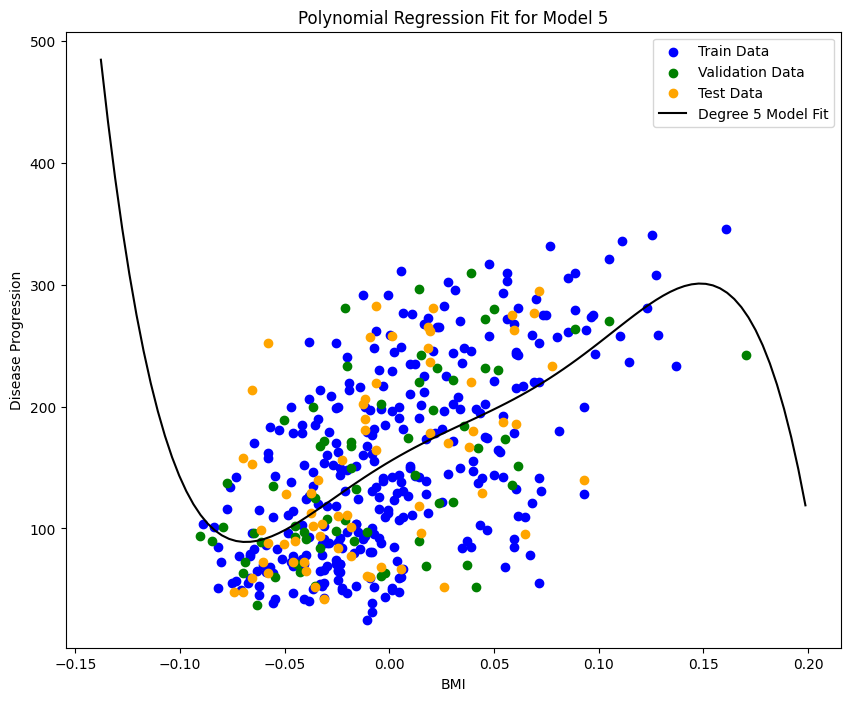

In [113]:
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting the train, validation, and test data points
ax.scatter(X_train_temp[:, 2], y_train_temp, label='Train Data', color='blue')
ax.scatter(X_valid[:, 2], y_valid, label='Validation Data', color='green')
ax.scatter(X_test[:, 2], y_test, label='Test Data', color='orange')

X_concat = np.concatenate((X_train_temp, X_valid, X_test))

# Plotting the fit of the chosen model
X_fit = np.linspace(X_concat.min(), X_concat.max(), 100).reshape(-1, 1)
X_fit_poly = PolynomialFeatures(degree=5).fit_transform(X_fit)
y_fit = models[5]['model'].predict(X_fit_poly)
ax.plot(X_fit, y_fit, label='Degree 5 Model Fit', color='black')

ax.set_xlabel('BMI')
ax.set_ylabel('Disease Progression')
ax.set_title('Polynomial Regression Fit for Model 5')
ax.legend()
plt.show()

**C. Write down the equation of the best model (with a two decimal digit precision, assuming it's sufficient). Manually calculate the expected diabetes progression for a BMI value of your choice, and compare it to model.perdict() for that value**

In [114]:
coefficients = models[5]['model'].coef_

# Writing down the equation of the best model
equation = f"y = {coefficients[0]:.2f} + {coefficients[1]:.2f} * BMI + {coefficients[2]:.2f} * BMI^2 + {coefficients[3]:.2f} * BMI^3 + {coefficients[4]:.2f} * BMI^4 + {coefficients[5]:.2f} * BMI^5"
print("Equation of the best model (degree 5): \n", equation)


# Manually calculating the expected diabetes progression for a BMI value of your choice
chosen_bmi = 25.0  # Choose a BMI value
expected_progression_manual = coefficients[0] + coefficients[1] * chosen_bmi + coefficients[2] * chosen_bmi**2 + coefficients[3] * chosen_bmi**3 + coefficients[4] * chosen_bmi**4 + coefficients[5] * chosen_bmi**5
print("\nManually calculated expected progression for BMI of", chosen_bmi, ":", expected_progression_manual)

# Comparing with model prediction for the same value
X_chosen_bmi = np.array([[chosen_bmi]])
X_chosen_bmi_poly = PolynomialFeatures(degree=5).fit_transform(X_chosen_bmi)
expected_progression_model = models[5]['model'].predict(X_chosen_bmi_poly)[0]
print("Model prediction for the same BMI value:", expected_progression_model)

Equation of the best model (degree 5): 
 y = 0.00 + 1020.80 * BMI + -4912.86 * BMI^2 + 674.46 * BMI^3 + 914675.81 * BMI^4 + -4761817.10 * BMI^5

Manually calculated expected progression for BMI of 25.0 : -46144817366917.26
Model prediction for the same BMI value: -46144817366762.55


#### iii. How many trainable parameters are we fitting for each of the six models? Explain these values. One way is to use sklearn function get_feature_names_out()

In [115]:
degrees = [0, 1, 2, 3, 4, 5]

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X_train_temp[:, np.newaxis, 2])
    feature_names = poly_features.get_feature_names_out()
    num_params = X_poly.shape[1]

    print(f"Degree {degree}: {feature_names}")

Degree 0: ['1']
Degree 1: ['1' 'x0']
Degree 2: ['1' 'x0' 'x0^2']
Degree 3: ['1' 'x0' 'x0^2' 'x0^3']
Degree 4: ['1' 'x0' 'x0^2' 'x0^3' 'x0^4']
Degree 5: ['1' 'x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5']


In polynomial regression models, the number of trainable parameters corresponds to the total number of coefficients that the model learns. Each term in the polynomial equation contributes to the number of parameters, and as the degree of the polynomial increases, more parameters are introduced.

For example:

A degree 0 model has 1 parameter (intercept term). <br>
A degree 1 model has 2 parameters (intercept and linear coefficient). <br>
A degree 2 model has 3 parameters (intercept, linear coefficient, and quadratic coefficient).

Increasing the degree introduces more complexity and flexibility in capturing intricate patterns in the data. However, it also raises the risk of overfitting, where the model fits the training data too closely and may not generalize well to new, unseen data. Balancing model complexity with the risk of overfitting is crucial in selecting an appropriate degree for polynomial regression.

#### Conclusion

The project demonstrates the utility of polynomial regression modeling in analyzing the relationship between BMI and disease progression in diabetes patients. The insights gained from this analysis contribute to our understanding of diabetes progression and offer potential avenues for improved diagnosis and treatment strategies.

1. Modeling and Evaluation:

The degree 5 polynomial regression model exhibited the best performance across multiple evaluation metrics on both the training and validation sets.

Degree 5:
R-squared (Train): 0.36815468426778364
R-squared (Validation): 0.3276147248067698
MAE (Train): 52.06585524169334
MAE (Validation): 46.505717908451146
MAPE (Train): 48.68155494994758
MAPE (Validation): 40.91387617467334

2. Model Interpretation:

The equation of the best model (degree 5) was derived, providing insights into the relationship between BMI and disease progression.
The number of trainable parameters for each model was calculated, demonstrating how the complexity of the model increases with the degree of the polynomial.

Equation of the best model (degree 5): <br>
y = 0.00 + 1020.80 * BMI + -4912.86 * BMI^2 + 674.46 * BMI^3 + 914675.81 * BMI^4 + -4761817.10 * BMI^5

Manually calculated expected progression for BMI of 25.0 : -46144817366917.26 <br>
Model prediction for the same BMI value: -46144817366762.55

* Therefore, the degree 5 polynomial regression model was selected as the best fit for predicting disease progression based on BMI, balancing model complexity and predictive performance.